# Decision Tree

## Entropy

In [6]:
import math

In [7]:
Total_Entropy=(9/14)*math.log(14/9,2) +(5/14)*math.log(14/5,2)
Total_Entropy

0.940285958670631

In [8]:
Humidity_high= (3/7)*math.log(7/3,2) +(4/7)*math.log(7/4,2)
Humidity_high

0.9852281360342514

In [9]:
Humidity_Norm= (6/7)*math.log(7/6,2) +(1/7)*math.log(7/1,2)
Humidity_Norm

0.5916727785823275

In [10]:
Inform_gain_humidity= Total_Entropy-((7/14)*Humidity_high + (7/14)*Humidity_Norm)
Inform_gain_humidity

0.15183550136234159

In [11]:
Windy_Strong= (3/6)*math.log(6/3,2) +(3/6)*math.log(6/3,2)
Windy_Strong

1.0

In [12]:
math.log(1,2)

0.0

In [13]:
Sunny_Humid_Total_Ent= (2/5)*math.log(5/2,2) +(3/5)*math.log(5/3,2)
Sunny_Humid_Total_Ent

0.9709505944546687

In [14]:
sunny_wind_strong= (1/2)*math.log(2/1,2) +(1/2)*math.log(2/1,2)
sunny_wind_strong

1.0

In [15]:
sunny_wind_weak= (1/3)*math.log(3/1,2) +(2/3)*math.log(3/2,2)
sunny_wind_weak

0.9182958340544896

In [16]:
Inform_Gain_sunny_wind= Sunny_Humid_Total_Ent-((2/5)*1 +(3/5)*0.918)

In [17]:
Inform_Gain_sunny_wind

0.020150594454668713

## Gini

In [18]:
GI_for_sunny= 1-((2/5)**2 + (3/5)**2)

In [19]:
GI_for_sunny

0.48

In [20]:
GI_for_Overcast= 1-((4/4)**2 + (0/4)**2)

In [21]:
GI_for_Overcast

0.0

In [22]:
GI_for_rainy= 1-((3/5)**2 + (2/5)**2)
GI_for_rainy

0.48

In [23]:
GI_outlook=((0.48)*(5/14))+ ((4/14)*0) +((0.48)*(5/14))

In [24]:
GI_outlook

0.34285714285714286

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.impute import SimpleImputer

In [116]:
data=pd.read_csv('horse.csv')

In [117]:
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [118]:
target=data[['outcome']]

In [119]:
target.value_counts()

outcome   
lived         178
died           77
euthanized     44
dtype: int64

In [120]:
features=data.drop('outcome',axis=1)

In [121]:
features

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,distend_large,45.0,8.4,NaN,NaN,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,other,50.0,85.0,cloudy,2.0,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,normal,33.0,6.7,NaN,NaN,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,NaN,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,distend_large,55.0,65.0,NaN,NaN,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,distend_small,44.0,NaN,serosanguious,3.3,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,distend_large,60.0,6.8,NaN,NaN,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,distend_small,50.0,6.0,serosanguious,3.4,yes,2208,0,0,yes


In [122]:
features=pd.get_dummies(features)

In [123]:
features

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,...,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_no,surgical_lesion_yes,cp_data_no,cp_data_yes
0,530101,38.5,66.0,28.0,NaN,45.0,8.4,NaN,11300,0,...,0,0,0,0,0,0,1,0,1,0
1,534817,39.2,88.0,20.0,NaN,50.0,85.0,2.0,2208,0,...,0,0,1,0,1,0,1,0,1,0
2,530334,38.3,40.0,24.0,NaN,33.0,6.7,NaN,0,0,...,0,1,0,0,0,0,1,0,0,1
3,5290409,39.1,164.0,84.0,5.0,48.0,7.2,5.3,2208,0,...,0,0,0,0,0,1,0,1,0,1
4,530255,37.3,104.0,35.0,NaN,74.0,7.4,NaN,4300,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,NaN,55.0,65.0,NaN,3205,0,...,0,0,0,0,0,0,1,0,1,0
295,527702,37.2,72.0,24.0,NaN,44.0,NaN,3.3,2208,0,...,0,0,0,0,0,1,0,1,0,1
296,529386,37.5,72.0,30.0,NaN,60.0,6.8,NaN,3205,0,...,0,0,0,0,0,0,0,1,1,0
297,530612,36.5,100.0,24.0,NaN,50.0,6.0,3.4,2208,0,...,0,0,0,0,0,1,0,1,0,1


In [124]:
features.isnull().sum()

hospital_number                      0
rectal_temp                         60
pulse                               24
respiratory_rate                    58
nasogastric_reflux_ph              246
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 67, dtype: int64

In [125]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [126]:
x_train.isnull().sum()

hospital_number                      0
rectal_temp                         47
pulse                               22
respiratory_rate                    47
nasogastric_reflux_ph              177
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 67, dtype: int64

In [127]:
x_test.isnull().sum()

hospital_number                     0
rectal_temp                        13
pulse                               2
respiratory_rate                   11
nasogastric_reflux_ph              69
                                   ..
abdomo_appearance_serosanguious     0
surgical_lesion_no                  0
surgical_lesion_yes                 0
cp_data_no                          0
cp_data_yes                         0
Length: 67, dtype: int64

In [128]:
y_train.isnull().sum()

outcome    0
dtype: int64

In [129]:
y_test.isnull().sum()

outcome    0
dtype: int64

In [130]:
simple_impute=SimpleImputer( missing_values=np.nan,strategy='mean')

In [131]:
x_train=simple_impute.fit_transform(x_train)
x_test=simple_impute.fit_transform(x_test)

In [132]:
x_train

array([[5.27929000e+05, 3.81559322e+01, 7.17524752e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.28742000e+05, 3.71000000e+01, 4.00000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.33902000e+05, 3.85000000e+01, 4.00000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.27463000e+05, 3.75000000e+01, 9.60000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.30624000e+05, 4.00000000e+01, 7.80000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.30051000e+05, 3.81559322e+01, 8.00000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [133]:
x_test

array([[5.28800000e+05, 3.82048387e+01, 1.12000000e+02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [5.29960000e+05, 3.81000000e+01, 4.40000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.28179000e+05, 3.82000000e+01, 4.20000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.34157000e+05, 3.85000000e+01, 6.00000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.35054000e+05, 3.86000000e+01, 4.50000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.33928000e+05, 3.78000000e+01, 6.00000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [134]:
pd.DataFrame(x_train).isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
62    0
63    0
64    0
65    0
66    0
Length: 67, dtype: int64

In [135]:
pd.DataFrame(x_test).isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
62    0
63    0
64    0
65    0
66    0
Length: 67, dtype: int64

In [136]:
decision_tree=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, splitter='random')

In [137]:
y_pred=decision_tree.predict(x_test)

In [138]:
y_pred

array(['lived', 'lived', 'lived', 'lived', 'died', 'died', 'lived',
       'lived', 'lived', 'euthanized', 'lived', 'died', 'euthanized',
       'lived', 'lived', 'lived', 'died', 'lived', 'lived', 'lived',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'lived', 'lived', 'euthanized', 'lived', 'lived', 'died', 'lived',
       'lived', 'lived', 'lived', 'died', 'died', 'euthanized', 'lived',
       'lived', 'lived', 'lived', 'lived', 'died', 'lived', 'died',
       'lived', 'lived', 'lived', 'lived', 'lived', 'lived', 'died',
       'died', 'lived', 'lived', 'lived', 'lived', 'lived', 'lived',
       'euthanized', 'lived', 'lived', 'lived', 'lived', 'lived', 'died',
       'died', 'lived', 'lived', 'lived', 'lived', 'euthanized'],
      dtype=object)

In [139]:
accuracy_score(y_test,y_pred)

0.7333333333333333

# Grid Search

In [140]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [141]:
grid_search=GridSearchCV(decision_tree,params)

In [142]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [143]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}

# Plotting tree

In [144]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[21] <= 0.447\ngini = 0.573\nsamples = 224\nvalue = [63, 33, 128]'),
 Text(0.25, 0.625, 'x[6] <= 9.219\ngini = 0.642\nsamples = 143\nvalue = [52, 30, 61]'),
 Text(0.125, 0.375, 'x[16] <= 0.747\ngini = 0.586\nsamples = 84\nvalue = [41, 9, 34]'),
 Text(0.0625, 0.125, 'gini = 0.53\nsamples = 44\nvalue = [15, 3, 26]'),
 Text(0.1875, 0.125, 'gini = 0.515\nsamples = 40\nvalue = [26, 6, 8]'),
 Text(0.375, 0.375, 'x[55] <= 0.583\ngini = 0.629\nsamples = 59\nvalue = [11, 21, 27]'),
 Text(0.3125, 0.125, 'gini = 0.589\nsamples = 41\nvalue = [9, 9, 23]'),
 Text(0.4375, 0.125, 'gini = 0.494\nsamples = 18\nvalue = [2, 12, 4]'),
 Text(0.75, 0.625, 'x[49] <= 0.6\ngini = 0.296\nsamples = 81\nvalue = [11, 3, 67]'),
 Text(0.625, 0.375, 'x[2] <= 101.482\ngini = 0.202\nsamples = 72\nvalue = [6, 2, 64]'),
 Text(0.5625, 0.125, 'gini = 0.16\nsamples = 70\nvalue = [4, 2, 64]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.875, 0.375, 'x[33] <= 0.445\ngini = 0.

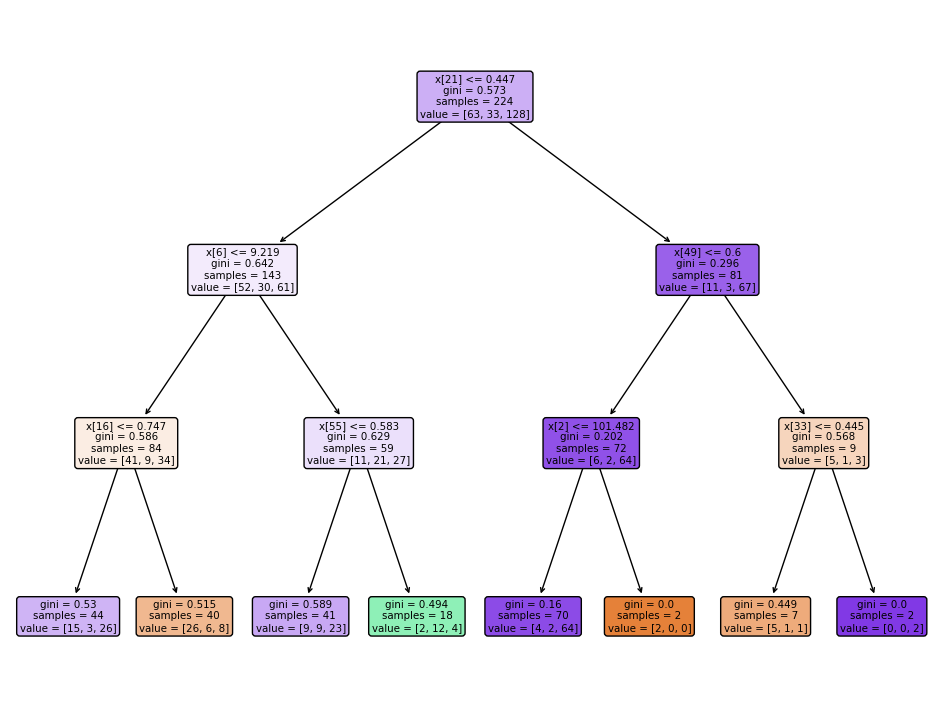

In [145]:
plt.figure(figsize=(12,9))
plot_tree(decision_tree,filled=True,rounded=True,feature_names=data.get(features),max_depth=3)

In [146]:
confusion_matrix(y_test,y_pred)

array([[ 8,  1,  5],
       [ 1,  3,  7],
       [ 4,  2, 44]], dtype=int64)

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        died       0.62      0.57      0.59        14
  euthanized       0.50      0.27      0.35        11
       lived       0.79      0.88      0.83        50

    accuracy                           0.73        75
   macro avg       0.63      0.57      0.59        75
weighted avg       0.71      0.73      0.72        75



# Naive bayes

In [148]:
((2/9)*(9/14))/(5/14)

0.39999999999999997

In [149]:
((3/9)*(9/14))/(7/14)

0.4285714285714286

In [150]:
Pyes=(3/9)*(6/9)*(3/9)*(9/14)
Pyes

0.04761904761904762

In [151]:
Pno=(2/5)*(2/5)*(4/5)*(5/14)
Pno

0.04571428571428573

In [152]:
Pyes_new= Pyes/(Pyes+Pno)
Pyes_new

0.510204081632653

In [153]:
Pyes_no= Pno/(Pyes+Pno)
Pyes_no

0.489795918367347

In [155]:
from sklearn.naive_bayes import BernoulliNB

In [157]:
bernoullin=BernoulliNB()

In [158]:
bernoullin.fit(x_train,y_train)

C:\Users\Deepak\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [159]:
y_pred=bernoullin.predict(x_test)

In [160]:
y_pred

array(['euthanized', 'lived', 'lived', 'lived', 'euthanized', 'died',
       'lived', 'lived', 'lived', 'died', 'lived', 'lived', 'euthanized',
       'died', 'lived', 'lived', 'euthanized', 'lived', 'lived',
       'euthanized', 'lived', 'lived', 'lived', 'died', 'died', 'lived',
       'died', 'lived', 'lived', 'died', 'lived', 'lived', 'died', 'died',
       'died', 'lived', 'lived', 'euthanized', 'died', 'died', 'died',
       'died', 'died', 'lived', 'lived', 'died', 'lived', 'died', 'lived',
       'died', 'died', 'lived', 'lived', 'died', 'died', 'lived', 'lived',
       'lived', 'lived', 'died', 'lived', 'lived', 'died', 'lived',
       'lived', 'died', 'lived', 'lived', 'died', 'died', 'lived',
       'lived', 'lived', 'lived', 'died'], dtype='<U10')

In [161]:
accuracy_score(y_test,y_pred)

0.5333333333333333